# Dateien in Python
## csv-Format
Bei dem Arbeiten mit Dateien wird oft eine Spalten-Aufteilung gewählt, wobei die erste Zeile eine Titelzeile mit den Spaltenüberschriften enthält.  
Weit verbreitet ist dabei das sog. csv-Format (**c**omma**s**eparated **v**alues). Die Standard-Bibliothek von Python enthält
das Modul „csv“, welches ein „Reader“ –Modul enthält.  https://docs.python.org/3/library/csv.html  
Beispiel daten_4.csv: 
```
1,['a','b',5],(2,3),'Text1'
2,['x','y',6],(4,5),'Text2'
3,['c','d',7],(8,9),'Text3'
4,['k','l',8],(7,8),'Text4'
```


In [4]:
import csv
#help(csv)

In [9]:
print(' x '.join(['zahl', 'String', 'tupel', 'Text']))
print(' x '.join(['zahl', 'String', 'tupel', 'Text']).title())
print(' x '.join(['zahl', 'String', 'tupel', 'Text']).capitalize())
#' # '.join(['zahl', 'String', 'Tupel', 'Text']).capitalize()


zahl x String x tupel x Text
Zahl X String X Tupel X Text
Zahl x string x tupel x text


In [16]:
import csv
with open('daten_4.csv') as csv_file:
    csv_reader= csv.reader(csv_file, delimiter=';')
    #print(type(csv_reader))
    line_count= 0
    for row in csv_reader:
        #print(row)
        if line_count== 0:
            #print(row)
            print(f"Spaltennamen sind {'| '.join(row).title()}\n")
            print(f"Spaltenname:\t{row[0]}\t{row[1]}\t{row[2]}\t{row[3]}")
            line_count+= 1
        else:
            print(f'Zeile {line_count}:\t{row[0]}\t{row[1]}\t{row[2]}\t{row[3]}')
            #print(row[0], row[2])
            line_count+= 1
print(f"\tBearbeitet: {line_count} Zeilen.")
#row[2]    # Zugriff als String

Spaltennamen sind Zahl| String| Tupel| Text

Spaltenname:	Zahl	String	Tupel	Text
Zeile 1:	1	'b'	(2,3)	'Text1'
Zeile 2:	2	'x'	(4,5)	'Text2'
Zeile 3:	3	'c'	(8,9)	'Text3'
Zeile 4:	4	'k'	(7,8)	'Text4'
	Bearbeitet: 5 Zeilen.


In [17]:
import csv
with open('daten_5.txt') as csv_file:
    csv_reader= csv.reader(csv_file, delimiter=':')
    line_count= 0
    for row in csv_reader:
        #print(row)
        if line_count== 0:
            print(f"Spaltennamen sind {'| '.join(row).title()}")
            line_count+= 1
        else:
            print(f'Zeile {line_count}\t{row[0]}\t{row[1]}\t{row[2]}\t{row[3]}')
            line_count+= 1
print(f"\tBearbeitet: {line_count} Zeilen.")

Spaltennamen sind Zahl| String| Tupel| Text
Zeile 1	1	'a'	(2,3)	'Text1'
Zeile 2	2	'x'	(4,5)	'Text2'
Zeile 3	3	'c'	(8,9)	'Text3'
Zeile 4	4	'k'	(7,8)	'Text4'
	Bearbeitet: 5 Zeilen.


## Formatieren in ein Dictionary (nur wenn Kopfzeile vorhanden ist)

In [33]:
import csv
line_count= 0
with open('daten_6.txt', mode='r') as csv_file:
    csv_reader= csv.DictReader(csv_file)   # Kopfzeile wird für Schlüssel verwendet
#    print(list(csv_reader), type(csv_reader))
    for row in csv_reader:
        #print(row)
        print(f'Zeile\t {line_count}\t{row["name"]:20}\t{row["abteilung"]:15}\t{row["geburtsmonat"]}')
        line_count += 1
print(f"\tBearbeitet: {line_count} Zeilen.")

Zeile	 0	Claus Schmidt       	Buchhaltung    	November
Zeile	 1	Herta Kleber        	IT             	März
Zeile	 2	Clemens Matulla     	Engineering    	Mai
	Bearbeitet: 3 Zeilen.


## Schreiben mit csv.writer:

In [48]:
import csv
with open('daten_7.csv', mode='w',newline="\n") as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL) # siehe unten
#    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', escapechar='\\', quoting=csv.QUOTE_NONE) # siehe unten
    employee_writer.writerow(['Claus, Schmidt', 'Buchhaltung', 'November',1])
    employee_writer.writerow(['Herta Kleber', 'IT', 'März',2])
    employee_writer.writerow(['Clemens Matulla', 'Engineering', 'Mai',3])

In [ ]:
csv.list_dialects()

Der **quotechar** Parameter legt fest, mit welchem Zeichen ein Ausgabefeld zitiert (eingerahmt) werden soll.  
Zur Verfügung stehen writerow() und writerows() für zeilenweise oder vollständige Ausgabe.  
---
“The quotechar optional parameter tells the writer which character to use to quote fields when writing. Whether quoting is used or not, however, is determined by the quoting optional parameter:
- If quoting is set to csv.QUOTE_MINIMAL, then .writerow() will quote fields only if they contain the delimiter or the quotechar. This is the default case.
- If quoting is set to csv.QUOTE_ALL, then .writerow() will quote all fields.
- If quoting is set to csv.QUOTE_NONNUMERIC, then .writerow() will quote all fields containing text data and convert all numeric fields to the float data type.
- If quoting is set to csv.QUOTE_NONE, then .writerow() will escape delimiters instead of quoting them. In this case, you also must provide a value for the escapechar optional parameter.”

Es kann auch, von einem Dictionary ausgehend, mit csv.DictWriter geschrieben werden.  

Neben der gezeigten Verwendung der Zeilenvariable line_count kann auch mit der Methode „next“ gearbeitet werden, welche jeweils, ähnlich „readline“, eine einzelne Zeile abarbeitet.  

Weitere Funktionalitäten des Moduls sind eine "Dialect"- Ünterstützung für Formatoptionen, eine "sniffer" Methode zur Formaterkennung und z.B. eine DictWriter.writeheader Funktion.  

Eine vollständige Beschreibung des csv Moduls enthält die Datei „Library.pdf“ im Dokumentationsordner.

Zunächst soll eine csv-Datei mit Titelzeile aus einer bestehenden Datei erzeugt werden.
Dazu wird lediglich die Datei myfile2.dat eingelesen, welche bereits im csv-Format vorliegt.
Im folgenden Schritt soll die Datei mit der "csv.Reader" Methode eingelesen und zeilenweise ausgewertet werden. 

Ziel ist das Auslesen der Spaltenüberschriften und die Aufarbeitung der Daten für einen Matplotlib Plot.  

Dabei sollen die Spaltenüberschriften der Spalten 2 bis 4 für die Legendeneinträge der Linien verwendet werden.

Wie bereits erwähnt, ist das csv-Format ein gebräuchliches Dateiformat für numerische Daten. Falls man eine Liste der Spaltenüberschriften wünscht, kann das sehr einfach wie folgt erreicht werden:

In [52]:
### import csv
with open("myfile2.dat","r") as myfile2:
    csv_reader = csv.reader(myfile2)
    Titelzeile = next(csv_reader)
#    print(next(csv_reader))
    # for row in csv_reader:
    #     print(row)
#         break
    print(Titelzeile)
    for index, Spaltentitel in enumerate(Titelzeile):
        print(index,Spaltentitel)

['  x', '  y1', '  y2', '  y3']
0   x
1   y1
2   y2
3   y3


Da jetzt eine Übersicht über die enthaltenen Daten vorhanden ist, kann man via input() entscheiden, welche Datenreihe man in der Folge visualisieren will:

In [56]:
import csv
with open("myfile2.dat","r") as myfile2:
    csv_reader = csv.reader(myfile2)
    Titelzeile = next(csv_reader)
    values = []                    # Ergebnisliste 
    for index, Spaltentitel in enumerate(Titelzeile):
        print(f'Spalte {index}\tTitelzeile {Spaltentitel}')
    pos = int(input("Enter Row Number to visualize :"))
    for row in csv_reader:
        values.append(float(row[pos]))
print(values)

Spalte 0	Titelzeile   x
Spalte 1	Titelzeile   y1
Spalte 2	Titelzeile   y2
Spalte 3	Titelzeile   y3


Enter Row Number to visualize : 3


[3.0, 9.0, 15.0, 21.0, 27.0, 33.0, 39.0, 45.0, 51.0, 57.0, 63.0, 69.0, 75.0, 81.0, 87.0, 93.0, 99.0, 105.0, 111.0, 117.0, 123.0, 129.0, 135.0, 141.0, 147.0, 153.0, 159.0, 165.0, 171.0, 177.0, 183.0, 189.0, 195.0, 201.0, 207.0, 213.0, 219.0, 225.0, 231.0, 237.0, 243.0, 249.0, 255.0, 261.0, 267.0, 273.0, 279.0, 285.0, 291.0, 297.0, 303.0, 309.0, 315.0, 321.0, 327.0, 333.0, 339.0, 345.0, 351.0, 357.0, 363.0, 369.0, 375.0, 381.0, 387.0, 393.0, 399.0, 405.0, 411.0, 417.0, 423.0, 429.0, 435.0, 441.0, 447.0, 453.0, 459.0, 465.0, 471.0, 477.0, 483.0, 489.0, 495.0, 501.0, 507.0, 513.0, 519.0, 525.0, 531.0, 537.0, 543.0, 549.0, 555.0, 561.0, 567.0, 573.0, 579.0, 585.0, 591.0, 597.0]


Visualisierung mit matplotlib:

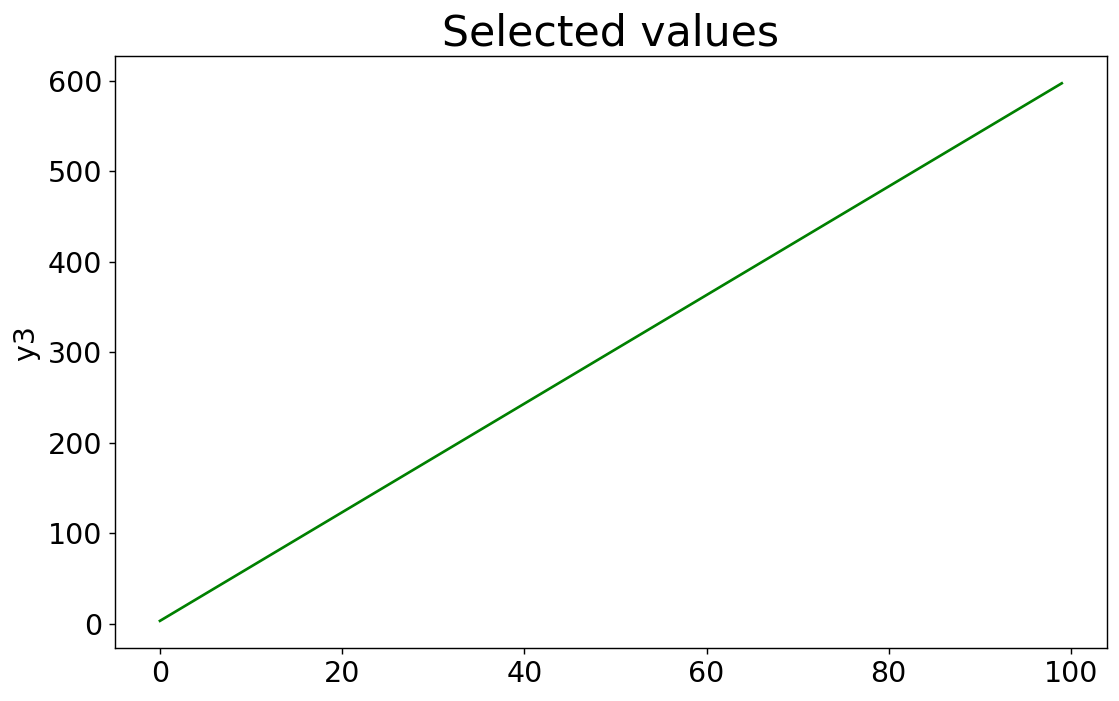

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(dpi=128, figsize=(10,6))
plt.plot(values, c ="green")
plt.title("Selected values", fontsize=24)
plt.xlabel("",fontsize=16)
plt.ylabel(Titelzeile[pos],fontsize=16)
plt.tick_params(axis = "both", which = "major", labelsize = 16)
plt.show()

## Das Modul Datetime: 

In [64]:
from datetime import datetime
date = datetime.strptime("2020-07-07","%Y-%m-%d")
#date = datetime.strptime("1966-07-07","%Y-%m-%d")
date = datetime.strptime("13.04.2020","%d.%m.%Y")
date = datetime.strptime("20042020T130322.44","%d%m%YT%H%M%S.%f")

print(date,type(date))

2020-04-20 13:03:22.440000 <class 'datetime.datetime'>


Mittels der Methode “strptime“ des Module datetime erfolgt die Umwandlung des Eingabestrings in das ausgegebene Datenobjekt vom Typ “datetime.datetime“. Das erste Argument ist der Eingabestring, das zweite Argument ist die Formatanweisung.   

Beispiele für Formatanweisungen für die Methoden "strftime" und "strptime" des Moduls "datetime":

|Argument|Bedeutung|
| :---    | :---  |
|%A|Name des Wochentages|
|%B|Name des Monats|
|%m|Nummer des Monats|
|%d|Nummer des Tages|
|%Y|Jahreszahl (vierstellig)|
|%y|Jahreszahl (zweistellig)|
|%H|Stunde (1-24)|
|%I|Stunde (1-12)|
|%p|Angabe AM/PM (Vor/Nachmittag)|
|%M|Minute|
|%S|Sekunde|
|%f|Millisekunden (6-stellig)|


Weitere datetime.str*time Formatcodes: https://docs.python.org/3/library/datetime.html

In der Folge wird ein Datensatz vom Deutschen Wetterdienst, dwd.de, verwendet, welcher die Tageshöchsttemperaturen
einer Wetterstation aus der Mitte Deutschlands enthält.  
Der Zeitraum umfasst den 01.01.2016 bis zum 07.08.2020. Die Temperaturdaten sind in der 4. Spalte enthalten, der x-Wert wurde zunächst ausgelassen. (Datei "DWD_TXK_MN004.csv")  

Spaltenueberschriften sind: Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Niveau,Qualitaet_Byte
Processed 1682 lines.


Detailed x-axis? (y/n) y


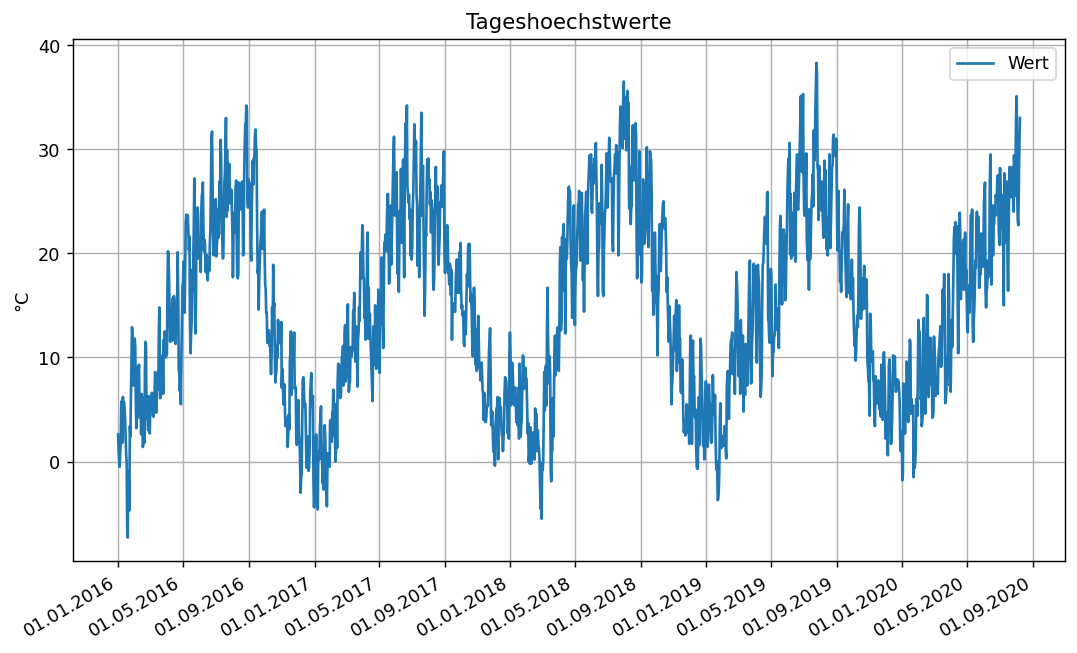

In [89]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

with open("DWD_TXK_MN004.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line_count = 0
    x = []
    y2 = []
    y3 = []
    #
    rowlist = []
    for row in csv_reader:
#        print("row:",row)
        if line_count == 0:
            print(f'Spaltenueberschriften sind: {",".join(row)}')  # unterschiedliche Anfuehrungszeichen-typen erforderlich
            y3_lab = row[3]  # Read column title
        else:
            date = datetime.strptime(row[2], "%Y%m%d") # Formatierung Datum
#            print(row[2],type(row[2]),date,type(date))
            x.append(date)                             # anhängen als x-Achsen Wert
            y3.append(float(row[3]))                   # Temperatur als y-Wert
        line_count += 1
    print(f"Processed {line_count} lines.")
res = input("Detailed x-axis? (y/n)")

myplt = plt.figure(dpi=128, figsize=(10, 6))
plt.ylabel("°C")
plt.title("Tageshoechstwerte")
plt.plot(x, y3, label=y3_lab)  # Set Legend entry to column title, then plot
if res == "y":
#    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Die Methode "gca" bedeutet
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))  # Die Methode "gca" bedeutet
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # "Get current axis".

myplt.autofmt_xdate()  # rotate labels to not overlap
#plt.xticks(rotation=40)

plt.legend()
plt.grid()
plt.show()




Mehrjähriger Verlauf der Tageshöchsttemperaturen für eine Meßstation in Mitteleuropa nach dwd.de:  

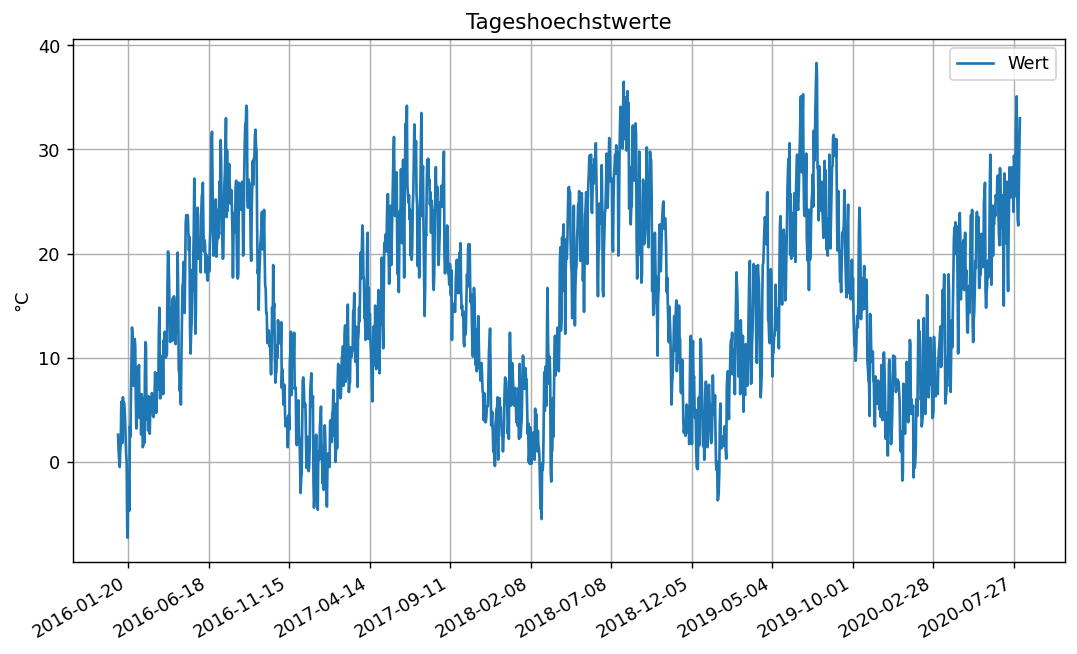

Zur Vermeidung der Überdeckung bei gleichzeitig besserer Platzverwendung wird der folgende Befehl zur Schrägstellung der
x-Achsenbeschriftung verwendet:  
```
myplt.autofmt_xdate()  # rotate labels to not overlap
```
